<a href="https://colab.research.google.com/github/electrojam/Curso-de-Regresion-Logistica-con-Python-y-scikit-learn/blob/main/regresion_logistica_binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Logística Binomial

### Carga de datos

In [141]:
import numpy as np
import pandas as pd

In [142]:
df_data = pd.read_csv('sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [143]:
df_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [144]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [145]:
df_data.info()  # miramos información del df

# se puede observar la cantidad de columnas o variables que tienel df
# se observa los tipos de variables
# llama la atención que col MonthlyCharges es de tipo float64, sin embargo TotalCharges es object, habría que cambiar su tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cambiar TotalCharges a numérico

In [146]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce') # errors='coerce', ignora los errores
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Manejo de valores nulos

In [147]:
df_data.isnull().sum() # mira los valores de nulos de cada columna y cuenta cuantos hay por columna

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [148]:
print(df_data.shape)
df_data.dropna(inplace=True)  # eliminamos filas, datos co valores nulos en columna TotalCharges
print(df_data.shape)

(7043, 21)
(7032, 21)


### Eliminamos variable o clumna ID
Porque no maneja nada, no tiene un significado, es un id aleatorio.

In [149]:
df_data.drop('customerID', axis=1, inplace=True)  #Borrado columna customerID

In [150]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [151]:
df_data.shape

(7032, 20)

## Convertir a numérico variable objetivo (Churn)

In [152]:
df_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_data['Churn'].replace(to_replace='No', value=0, inplace=True)

In [153]:
df_data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [154]:
df_data_processing = df_data.copy()

In [155]:
df_data_processing

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


### Convertimos variables categóricas que están en texto a numéricas, porque machine learning se lleva bien con los datos numéricos.

In [156]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [157]:
df_data_processing.shape

(7032, 46)

## Análisis de correlación entre Variables

In [158]:
import matplotlib.pyplot as plt

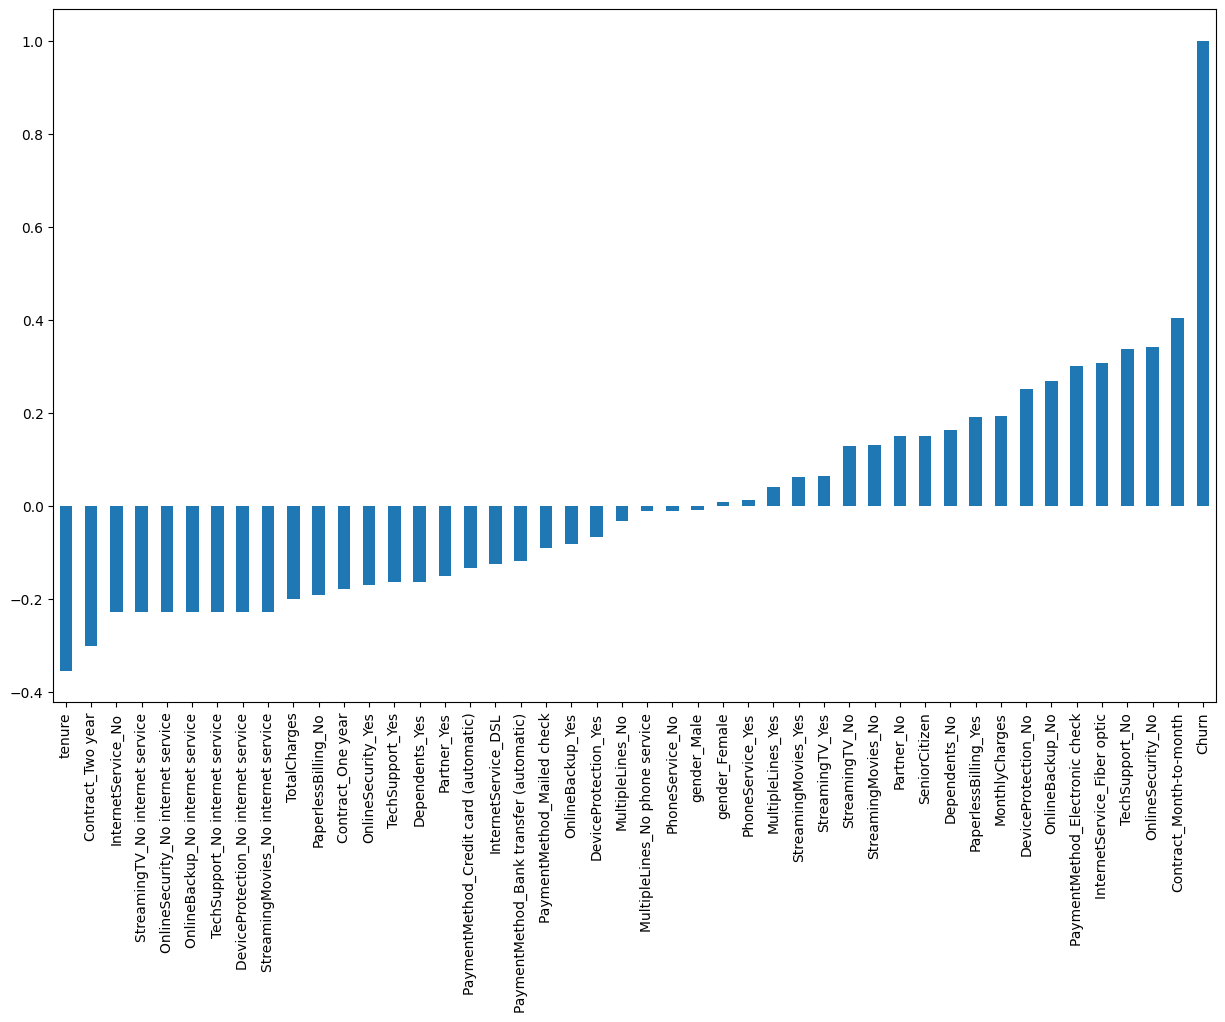

In [159]:
# miramos la correlación entre variable objetivo Churn y las demás variables
# graficamos solamente la variable Churn, porque se tienen muchas variables 46

fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

# en la gráfica Churn tiene correlación de 1, la más alta porque es la correlacióncon si misma.
# también Churn está altamente correlacionada con contract_Month-to-Month y con onlineSecurity_No.
# también Churn está altamente inversamente correlacionada con variable ternure y Contract_Two_year.
# también que Churn no tiene casi correlación con phoneService_No, gender_Male, gender_Female
# lo más importante no se evidencia problema de multicolienealidad, o variables que expresen exactamente lo mismo.
# por lo tanto dejamos el df tal cual

## Vamos a Escalar los datos

Para que sea mucho más fácil para el algoritmo enteder como manejarlos

In [160]:
from sklearn.preprocessing import MinMaxScaler # importamos método de escalamiento

In [161]:
scaler = MinMaxScaler() #Definnimos función scaler para que tenga método de escalamiento
df_data_processing_scaled = scaler.fit_transform(df_data_processing)

# el resultado arroja un array, un tensor

In [162]:
df_data_processing_scaled # muestra el array, el tensor

array([[0.        , 0.        , 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14084507, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04225352, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [163]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled) # convertimos a dataframe

In [164]:
df_data_processing_scaled.head()

# el resultado arroja que se perdieron los nombres de las columnas o variables

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [165]:
# asignamos nuevmente los nombres de las columnas que se tenía desde df_data_processing

df_data_processing_scaled.columns = df_data_processing.columns

In [166]:
df_data_processing_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos
mediante la visualización de los datos

In [167]:
import seaborn as sns

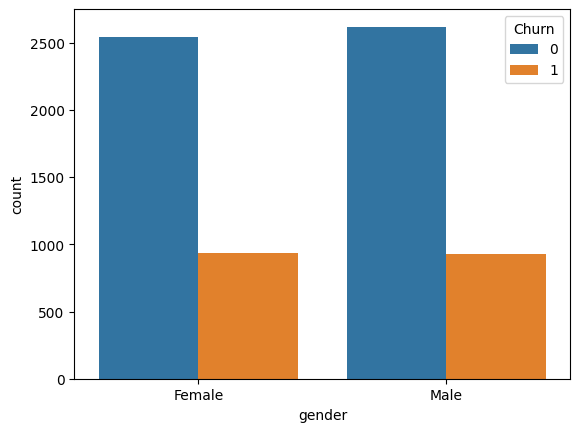

In [168]:
sns.countplot(data=df_data, x='gender', hue='Churn') # graficamos los datos de variable gender, del df original, discriminando por Churn
plt.show()

# el resultado arroja que las variables gender y male se comportan de la misma manera, incluso discriminadas por Churn
# puesto que tienen casi igual número de datos por Churn 0, Churn 1

In [169]:
# creamos función para visualizar en barras todas las variables categóricas del df original

def plot_categorical(column):
  fig = plt.figure(figsize=(7,7))
  sns.countplot(data=df_data, x=column, hue='Churn')
  plt.show()

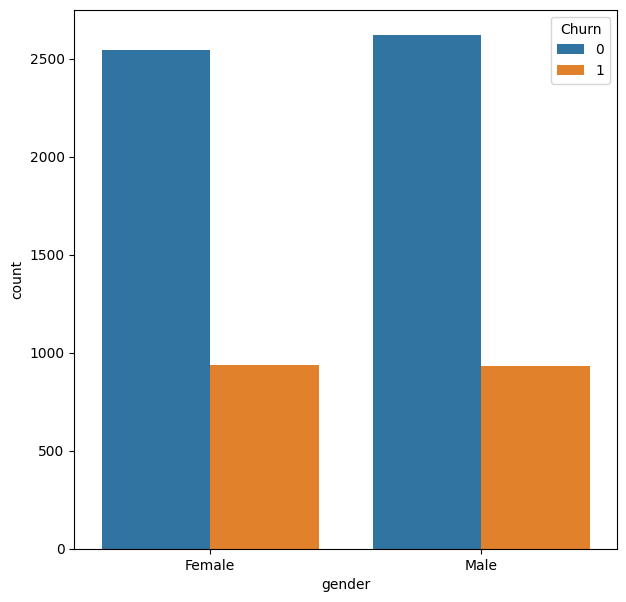

In [170]:
plot_categorical('gender') # llamamos a la función anterior pasándole propiedad gender.

In [171]:
# seleccionamos o filtramos los nombres de las columnas tipo object (categóricoas)

df_data.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [172]:
# ahora le pasamos, la selección o filtro de nombres de las columnas tipo object (categóricas)

column_categor = df_data.select_dtypes(include='object').columns

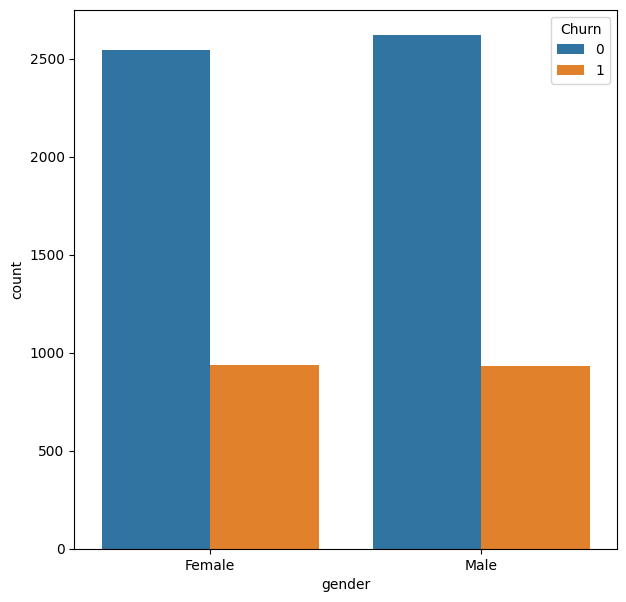

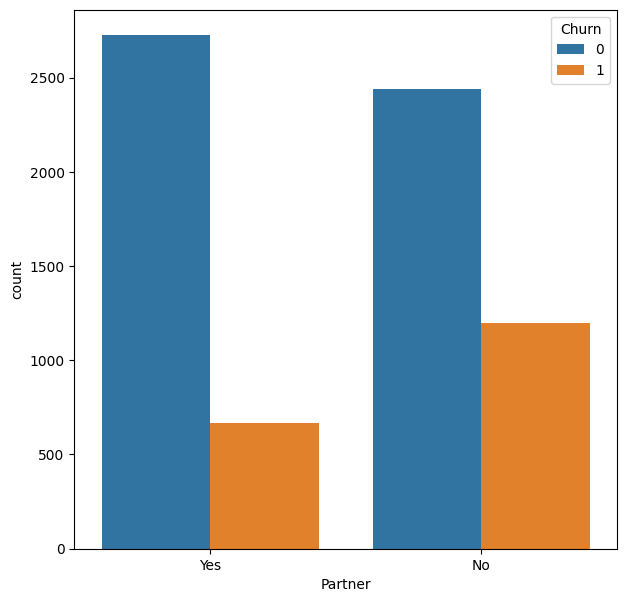

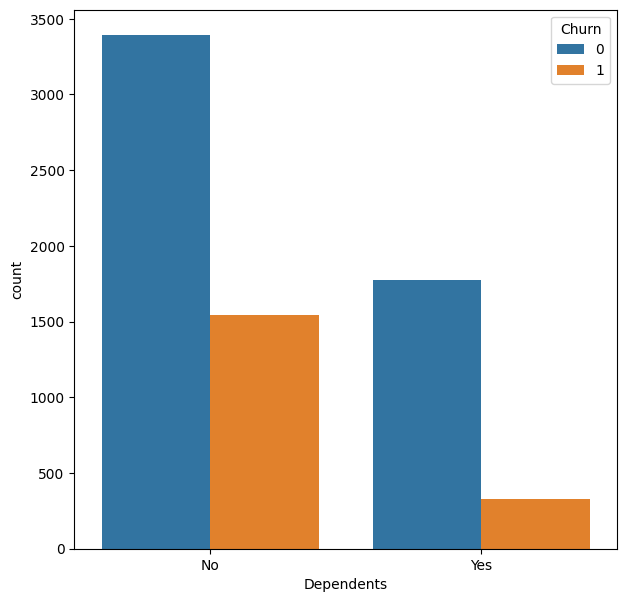

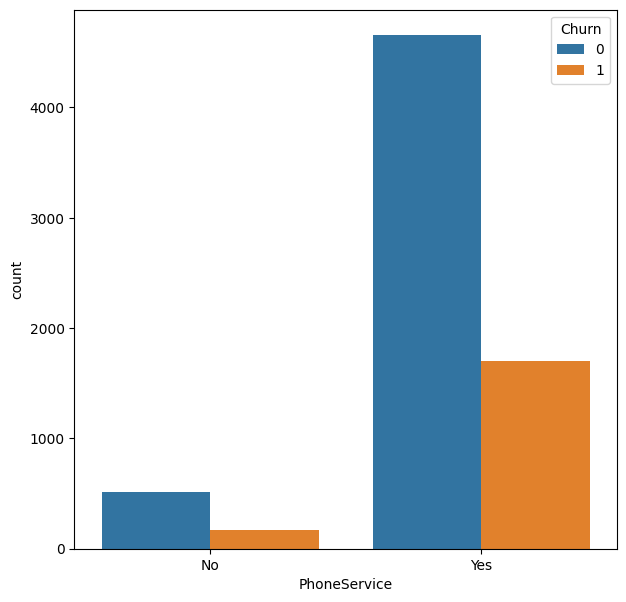

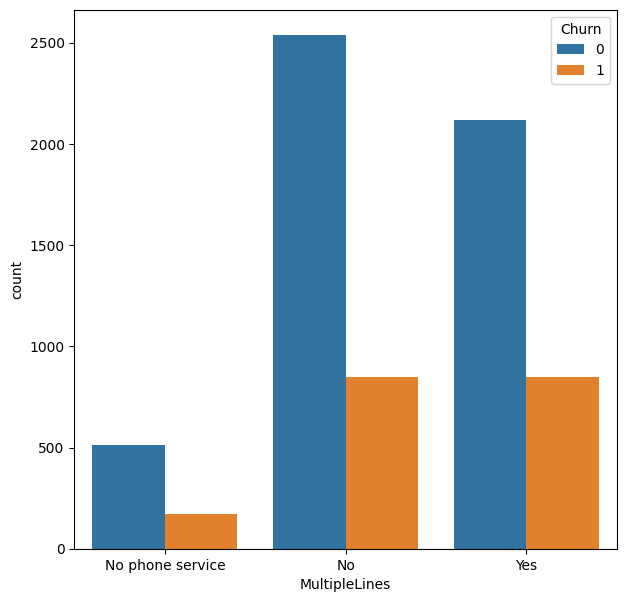

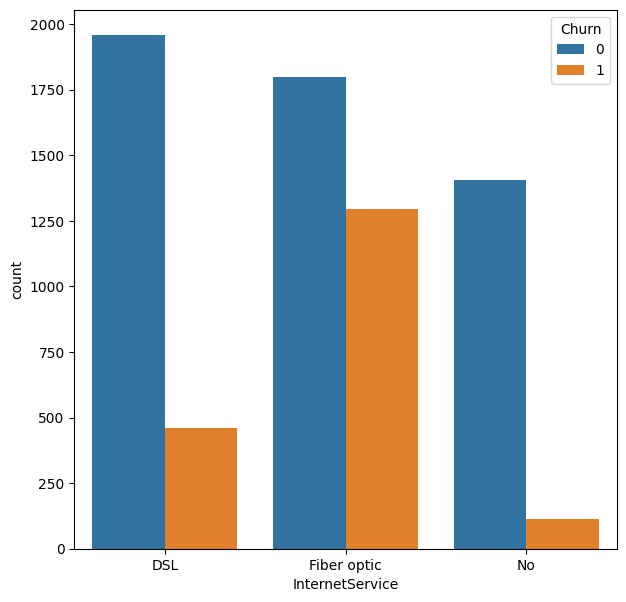

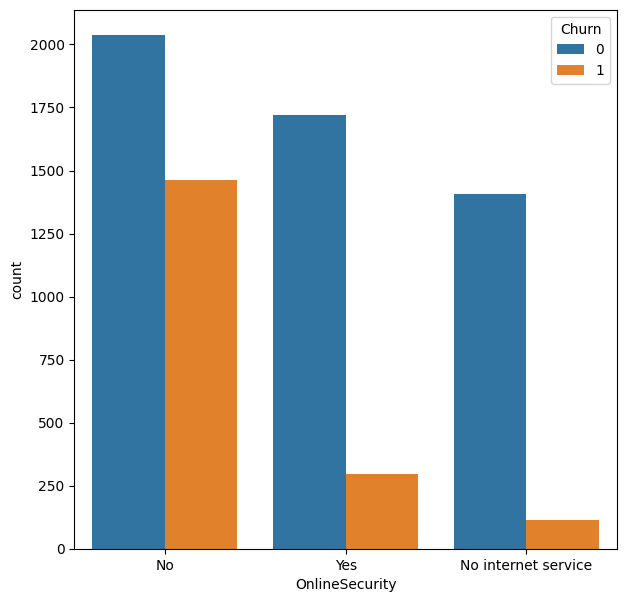

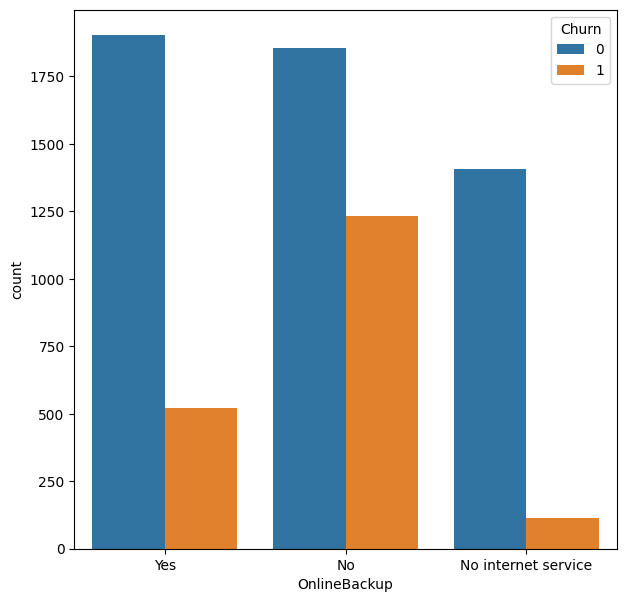

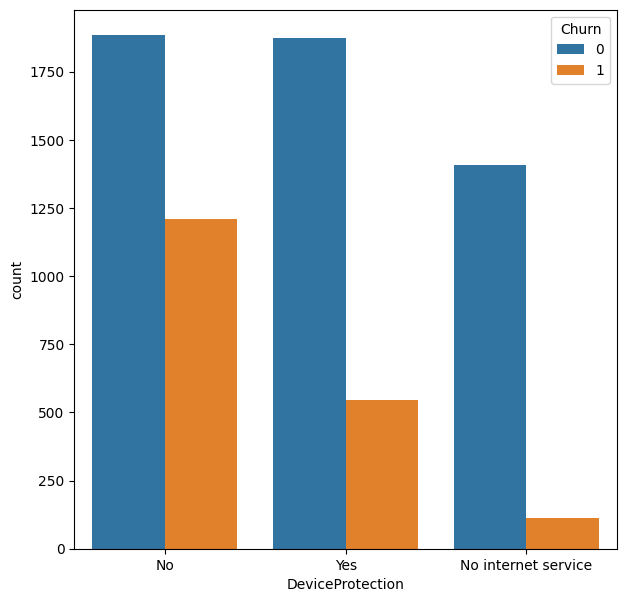

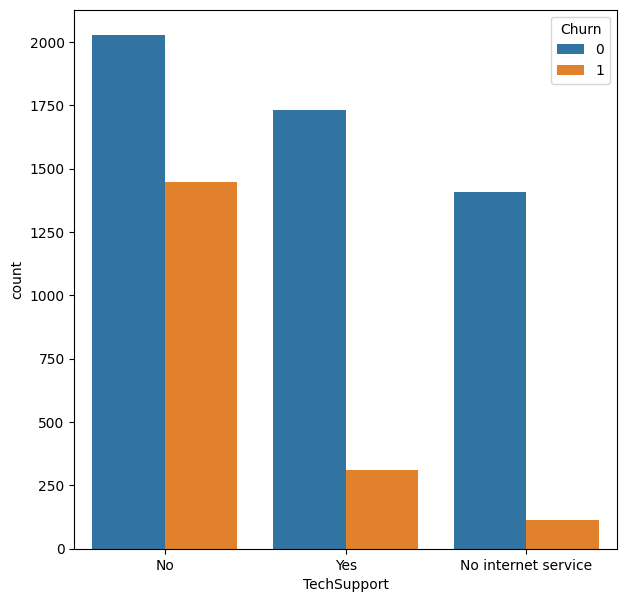

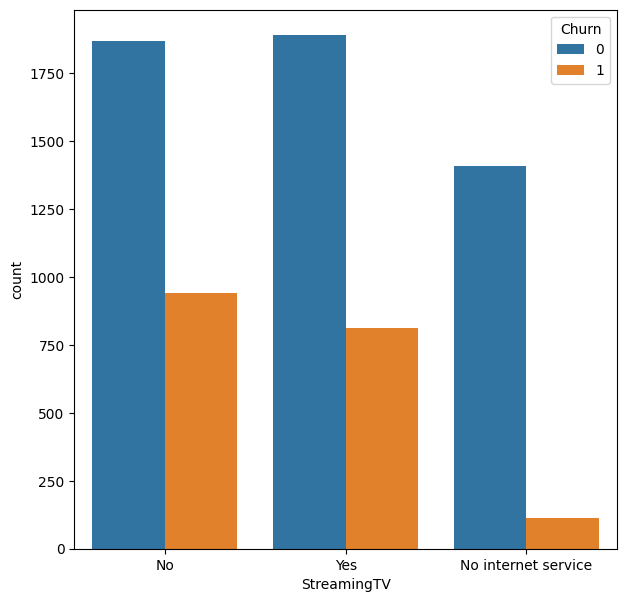

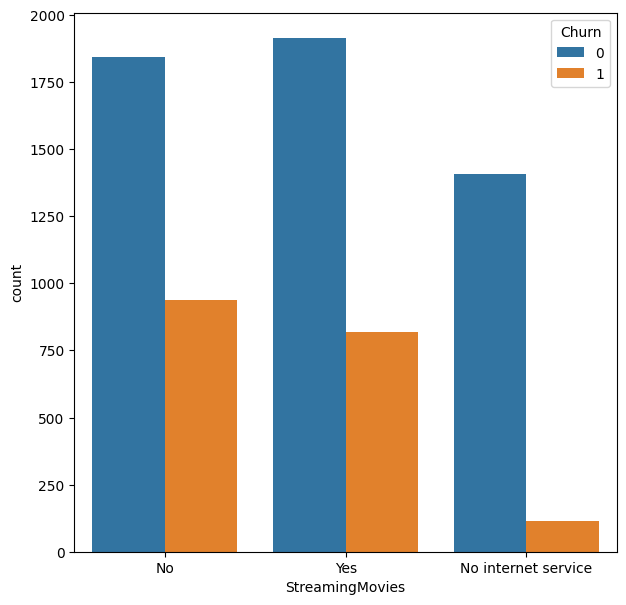

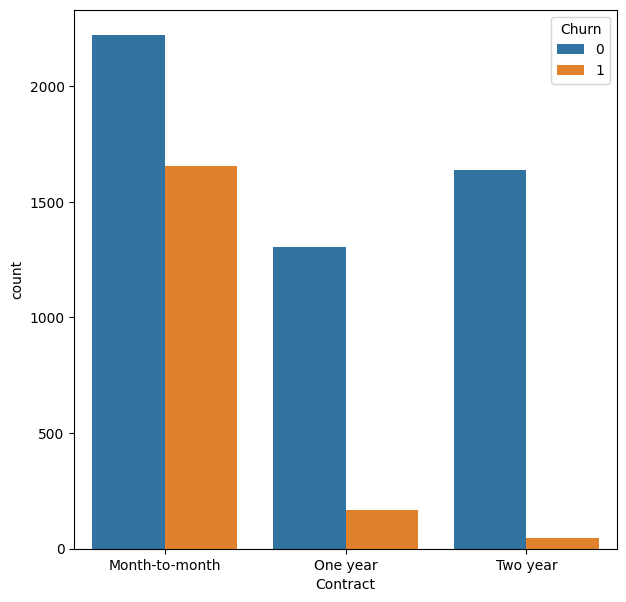

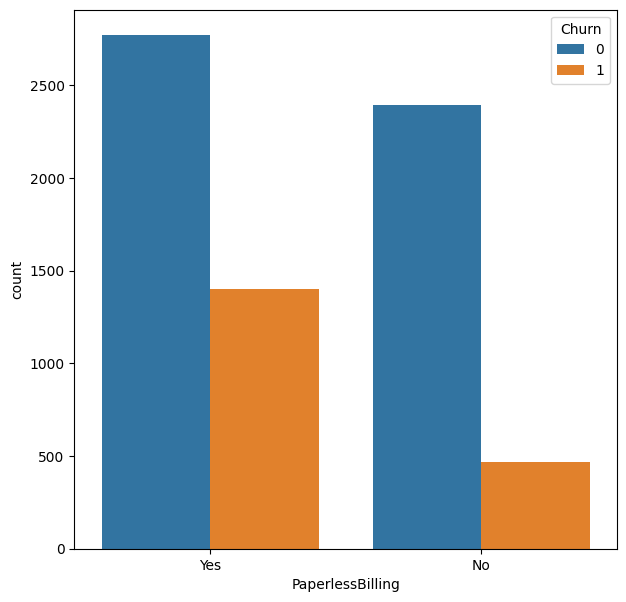

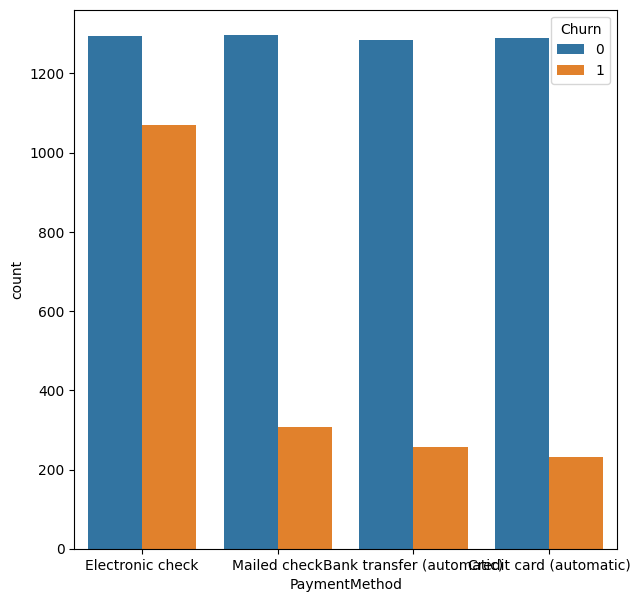

In [173]:
for i in column_categor:
  plot_categorical(i)

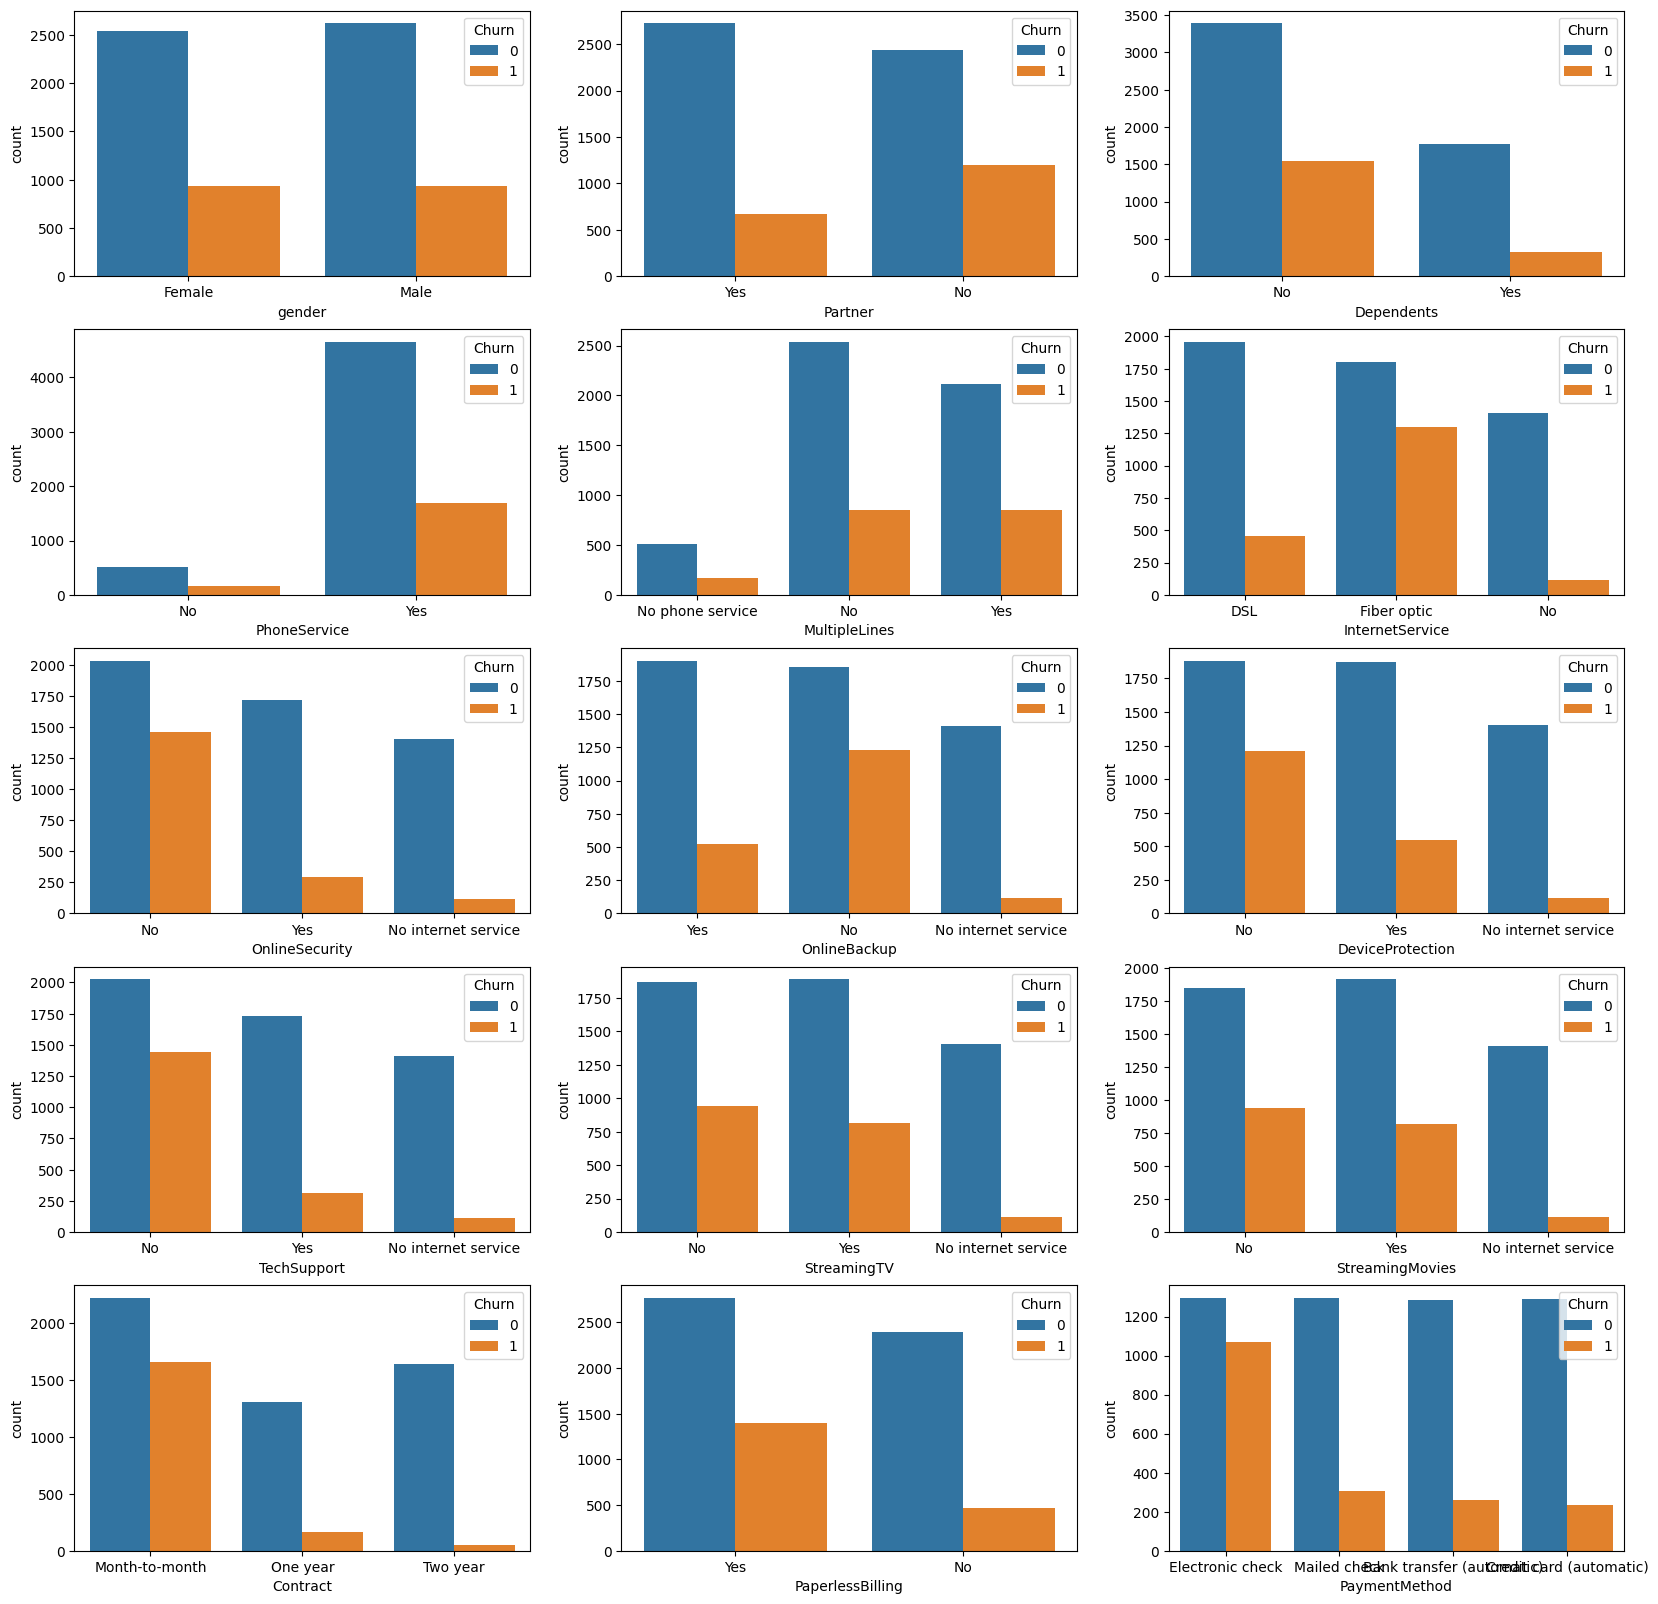

In [174]:
# otra forma de graficar en un solo gráfico las variable categóricas

column_categor = df_data.select_dtypes(include='object').columns

# cramos la figura y los subplots

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

for var, ax in zip(column_categor, axs.flatten()):
  sns.countplot(data=df_data, x=var, hue='Churn', ax=ax)

<Figure size 1000x800 with 0 Axes>

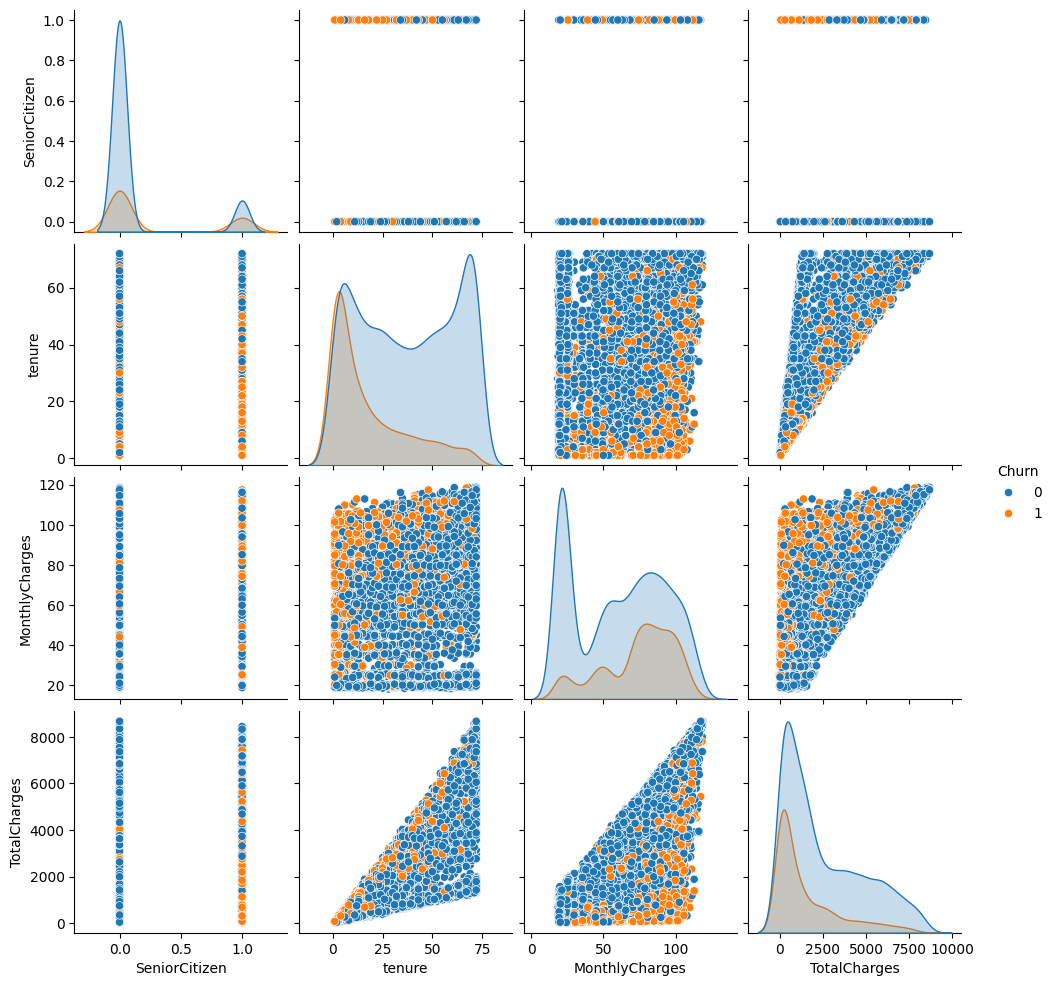

In [175]:
# Graficamos los datos, variables numéricos

fig = plt.figure(figsize=(10,8))
sns.pairplot(data=df_data, hue='Churn') # pairplot solo visualiza los datos numéricos
plt.show()

# del gráfico resultante se puede analizar que:

# entre más caro el valor del cargo mensual y menor la antiguedad en la compañía, es más prosenso a hacer Churn, renunciar a los servicios.


## Vamos a resolver el problema de clasificación Binomial

## Entrenamiento del  modelo de regresión logística binomial

In [176]:
# separamos los datos entre varialbes dependientes de las variables independientes

x = df_data_processing_scaled.drop('Churn', axis=1)
y = df_data_processing_scaled['Churn'].values # Churn es la variable dependiente

In [177]:
y

array([0., 0., 1., ..., 0., 1., 0.])

In [178]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [179]:
x_train.shape

(4922, 45)

In [180]:
x_test.shape

(2110, 45)

In [181]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()  # definimios variable con función entrenamiento
result = model.fit(x_train, y_train)  # entrenamos modelo con datos de entrenamiento x_train, y_train

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
# verificamos que lo arrojado por el entrenamiento estuvo bien o no
# mediante una  predicción con los datos test (de prueba)

from sklearn import metrics

prediction_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.795734597156398
